In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import japanize_matplotlib


In [2]:
data_path = "../data/p1ch7"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


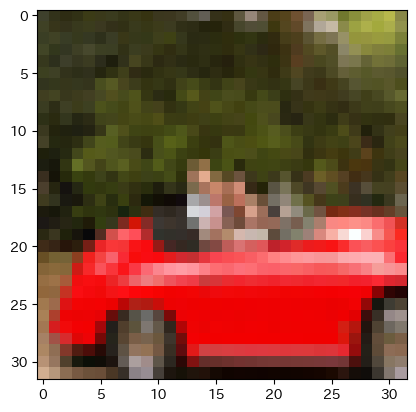

In [3]:
img, label = cifar10[99]
plt.imshow(img)

画像をテンソルとして出力(このとき、画像データが0~1の範囲にスケーリングされる)

In [4]:
data_path = "../data/p1ch7"
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [5]:
img_t, _ = tensor_cifar10[0]
img_t.shape

torch.Size([3, 32, 32])

In [6]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

画像データをまとめる

In [7]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3) # 画像データをまとめる
imgs.shape

torch.Size([3, 32, 32, 50000])

チャンネルごとの平均値を求める

In [8]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

チャンネルごとの標準偏差を求める

In [9]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

標準化

In [10]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
    ])
)

標準化後の画像を表示。RGBレベルが0.0から1.0の範囲外にシフトしたため画像が荒くなる

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


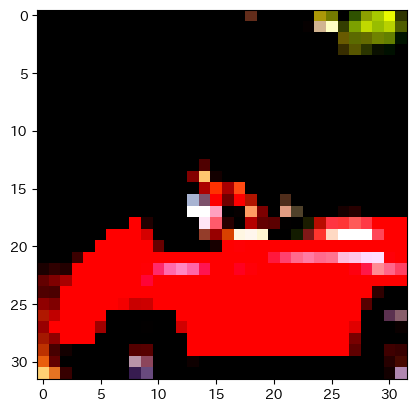

In [11]:
img_t, _ = transformed_cifar10[99]
img_t.shape
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [12]:
img_t.min(), img_t.max()

(tensor(-1.9803), tensor(2.1265))